In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
%matplotlib inline

reload(sys)  
sys.setdefaultencoding('utf8')

import statsmodels.api as sm


In [228]:
train = pd.read_csv("data/train_1.csv")
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [229]:
train.shape

(145063, 551)

In [230]:
train.Page.head()

0              2NE1_zh.wikipedia.org_all-access_spider
1               2PM_zh.wikipedia.org_all-access_spider
2                3C_zh.wikipedia.org_all-access_spider
3           4minute_zh.wikipedia.org_all-access_spider
4    52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
Name: Page, dtype: object

In [231]:
#split page column with '_' and take the last three values
metadata = pd.DataFrame((row.split('_')[-3:] for row in train.Page), columns=['host', 'access', 'agent'])
#get the lang part from 'zh.wikipedia.org'
metadata['lang'] = metadata.host.str.split('.').str.get(0)
metadata.head()

,host,access,agent,lang
0,zh.wikipedia.org,all-access,spider,zh
1,zh.wikipedia.org,all-access,spider,zh
2,zh.wikipedia.org,all-access,spider,zh
3,zh.wikipedia.org,all-access,spider,zh
4,zh.wikipedia.org,all-access,spider,zh


In [232]:
trainDF = pd.concat([train,metadata], axis=1)

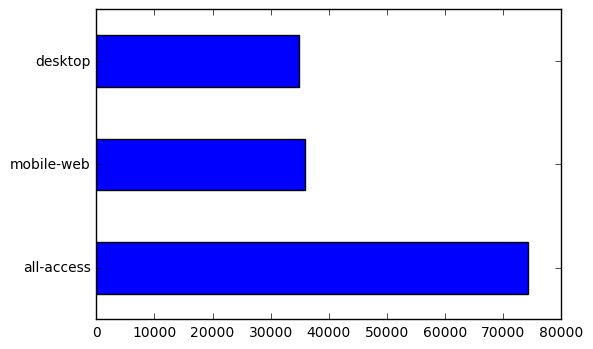

In [233]:
trainDF.access.value_counts().plot(kind="barh")

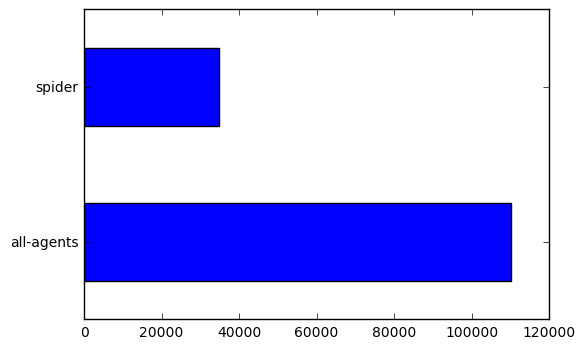

In [234]:
trainDF.agent.value_counts().plot(kind="barh")

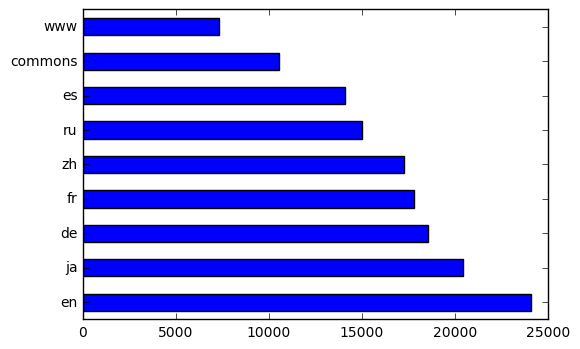

In [235]:
trainDF.lang.value_counts().plot(kind="barh")

In [236]:
trainDF[trainDF.lang=='www'].Page.head(10)
#generally lang==www does not contain any language information they are mediawiki articles

19611    "Keep_me_logged_in"_extended_to_one_year_www.m...
19612    2017_wikitext_editor_www.mediawiki.org_all-acc...
19613    2017_wikitext_editor/Feedback_www.mediawiki.or...
19614          API_www.mediawiki.org_all-access_all-agents
19615    API:Account_creation_www.mediawiki.org_all-acc...
19616    API:Allimages_www.mediawiki.org_all-access_all...
19617    API:Allpages_www.mediawiki.org_all-access_all-...
19618    API:Backlinks_www.mediawiki.org_all-access_all...
19619    API:Categoryinfo_www.mediawiki.org_all-access_...
19620    API:Client_Code_www.mediawiki.org_all-access_a...
Name: Page, dtype: object

In [237]:
trainDF[trainDF.lang=='commons'].Page.head(10)
#generally lang==commons does not contain any language information they are wikimedia articlese the warnings, itertools, pandas, numpy, matplotlib and statsmodels libraries. The warnings and itertools libraries come incle the warnings, itertools, pandas, numpy, matplotlib and statsmodels libraries. The warnings and itertools libraries come incl

13332      Accueil_commons.wikimedia.org_all-access_spider
13333    Atlas_of_Asia_commons.wikimedia.org_all-access...
13334    Atlas_of_Europe_commons.wikimedia.org_all-acce...
13335    Atlas_of_World_War_II_commons.wikimedia.org_al...
13336    Atlas_of_colonialism_commons.wikimedia.org_all...
13337    Atlas_of_the_United_Kingdom_commons.wikimedia....
13338    Atlas_of_the_United_States_commons.wikimedia.o...
13339       Bikini_commons.wikimedia.org_all-access_spider
13340    Campaign:OFBA2016_commons.wikimedia.org_all-ac...
13341    Catalogue_of_Wilhelm_von_Gloeden's_pictures_co...
Name: Page, dtype: object

## Analysis of Time Series according to languages

In [238]:
trainDF.lang.unique()

array(['zh', 'fr', 'en', 'commons', 'ru', 'www', 'de', 'ja', 'es'], dtype=object)

In [239]:
langDict = {}
langDict['zh'] = trainDF[trainDF.lang=='zh']
langDict['fr'] = trainDF[trainDF.lang=='fr']
langDict['en'] = trainDF[trainDF.lang=='en']
langDict['commons'] = trainDF[trainDF.lang=='commons']
langDict['ru'] = trainDF[trainDF.lang=='ru']
langDict['www'] = trainDF[trainDF.lang=='www']
langDict['de'] = trainDF[trainDF.lang=='de']
langDict['ja'] = trainDF[trainDF.lang=='ja']
langDict['es'] = trainDF[trainDF.lang=='es']

In [240]:
avg = {}
for key in langDict:
    avg[key] = pd.to_numeric(langDict[key].iloc[:,1:].sum(axis=0), errors='coerce')/ langDict[key].shape[0]
    #values for host, access and agent are NaN hence dropping them
    avg[key].dropna(inplace=True)
#     convert index to datetime
    avg[key].index = pd.to_datetime(avg[key].index)

In [241]:
avg['en'].head()

2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
dtype: float64

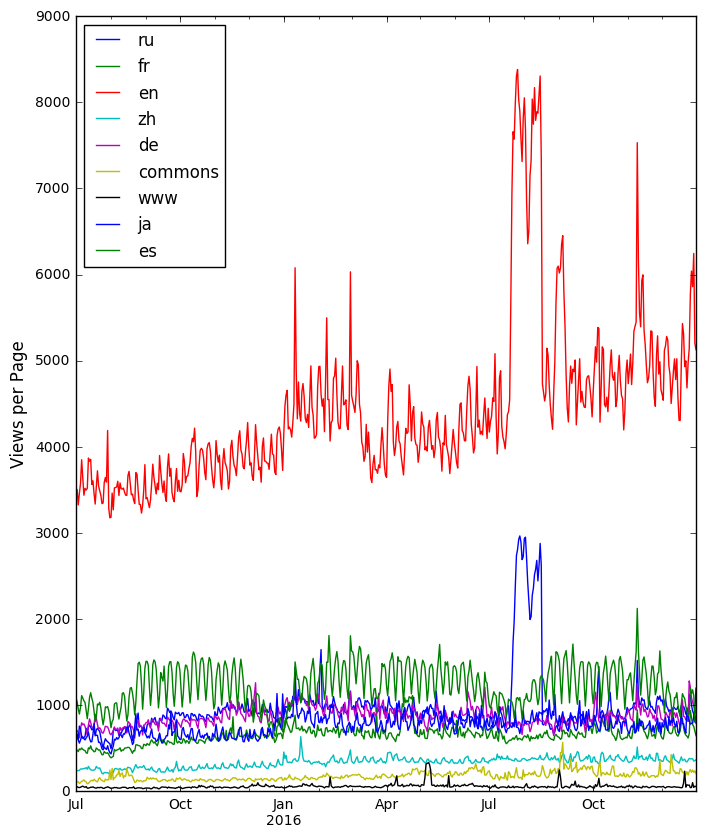

In [242]:
fig, ax = plt.subplots( figsize=(8, 10), sharex=True)
for key in avg:
    avg[key].plot(label=key)
plt.legend(loc='best')
ax.set_ylabel('Views per Page', size=12)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='best')
            
#     print key
#     plt.plot(np.array(avg[key].index), np.array(avg[key]), label = key)

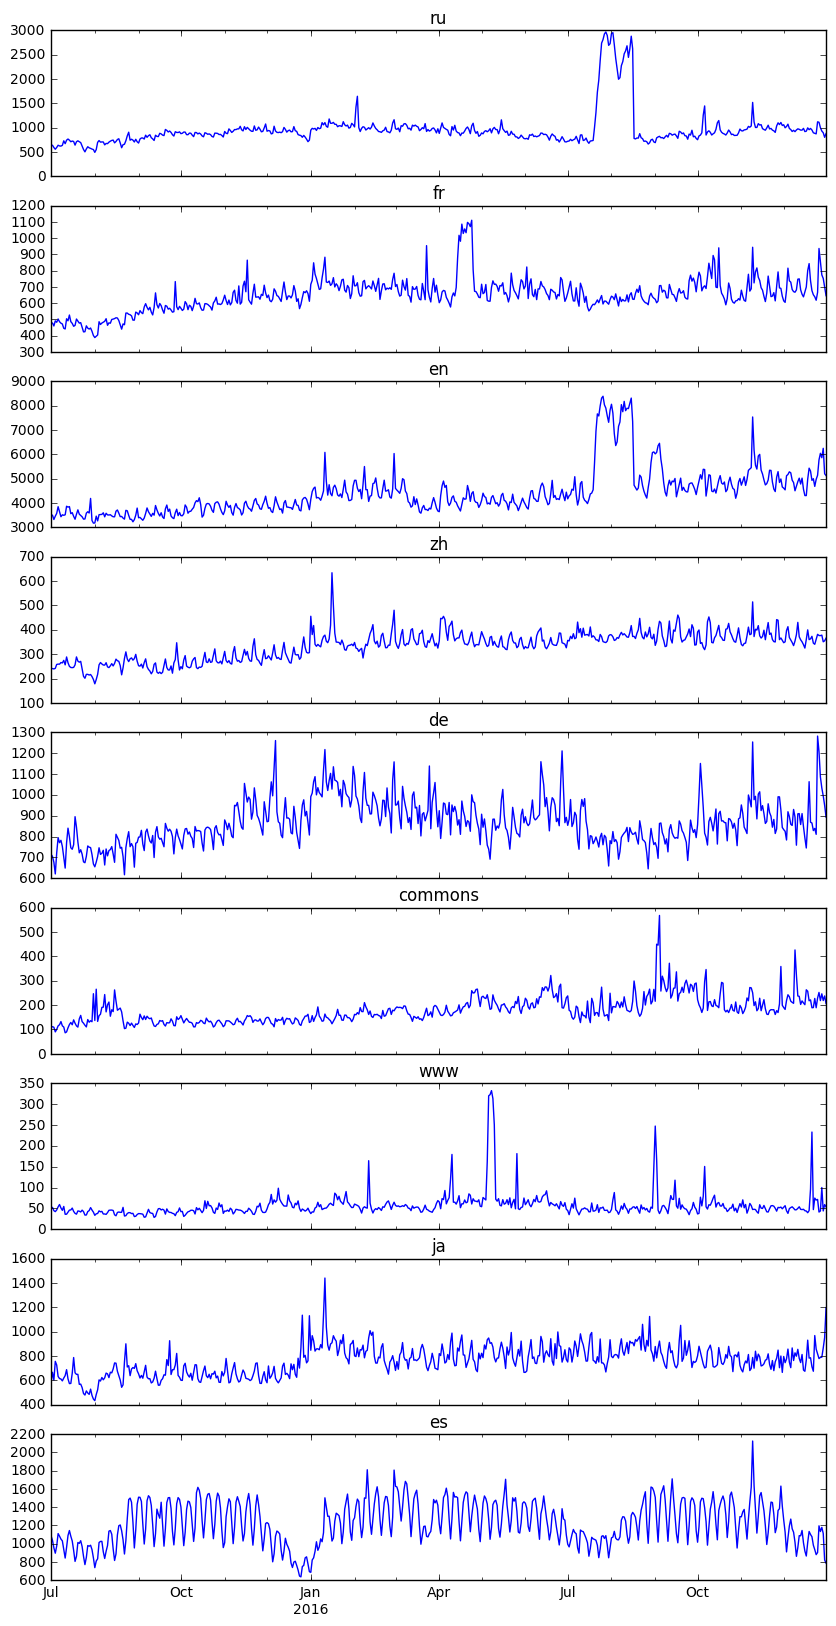

In [243]:
# plotting all TS plots seperately
fig, axs = plt.subplots(nrows=9, figsize=(10, 20), sharex=True)
for i, key in enumerate(avg):
    avg[key].plot(ax=axs[i])
    axs[i].set_title(key)



In [244]:
#Rolling window analysis for stationarity of series

def rollingAnalysis(timeseries, windowsize=10):
    rolmean = timeseries.rolling(window=windowsize, center=False).mean()
    rolstd = timeseries.rolling(window=windowsize, center=False).std()
    return rolmean, rolstd

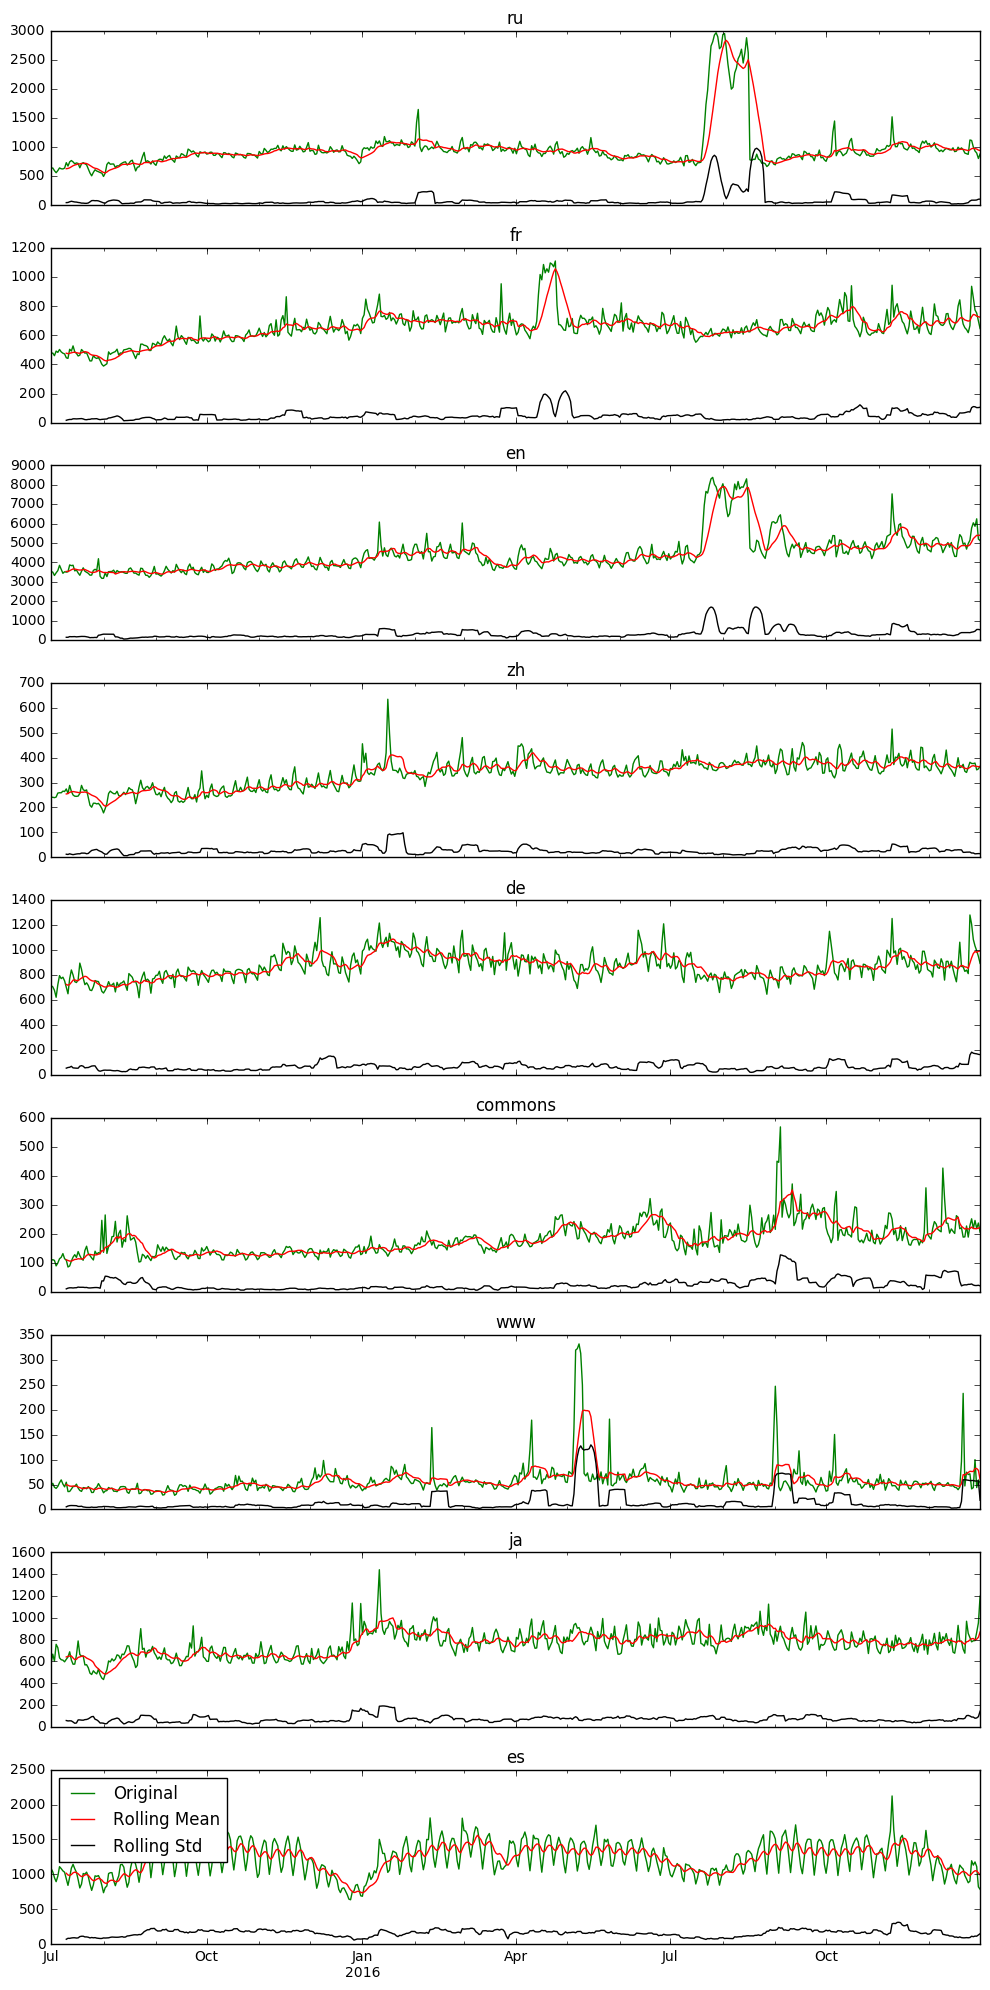

In [245]:
fig, axs = plt.subplots(nrows=9, figsize=(10, 20), sharex=True)
for i, key in enumerate(avg):
    rolmean, rolstd = rollingAnalysis(avg[key])
    avg[key].plot(ax=axs[i], color='green', label='Original')
    rolmean.plot(ax=axs[i], color='red', label='Rolling Mean')
    rolstd.plot(ax=axs[i], color='black', label='Rolling Std')
    axs[i].set_title(key)
    plt.legend(loc='best')
    plt.tight_layout()


In [246]:
""" We might not always be able to make a visual inferences whether
the time series is statinary hence we perform the augmented dickey fuller test for
stationarity of TS."""
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(avg['en'], autolag='AIC')
print "Results of Augmented Dickey Fuller Test for en"
dfoutput = pd.Series(dftest[0:4], 
                     index=['Test Statistic',
                            'p-value',
                            '#Lags Used',
                            'Number of Observations Used'])

for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -2.247284
p-value                          0.189534
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (5%)             -2.866957
Critical Value (1%)             -3.442632
Critical Value (10%)            -2.569655
dtype: float64

 ##### if pvalue is significantly higher, so we cannot reject the Null Hypothesis hence we cannot reject that there is a unit root.
 ##### if the test statistic is more than 5% critical value, this will show that time series is not stationary 

In [247]:
# decomposition = sm.tsa.seasonal_decompose(avg['en'])
type(avg['en'])

pandas.core.series.Series

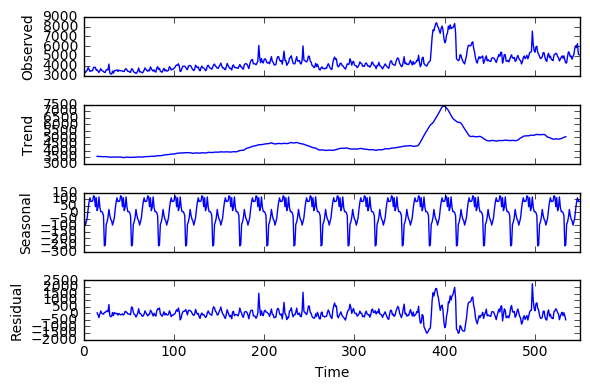

In [248]:
res = sm.tsa.seasonal_decompose(avg['en'].values, freq=30, model='additive')
resplot = res.plot()

In [249]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
autocorrelation = acf(avg['en'], nlags=100)
partial_autocorr = pacf(avg['en'])

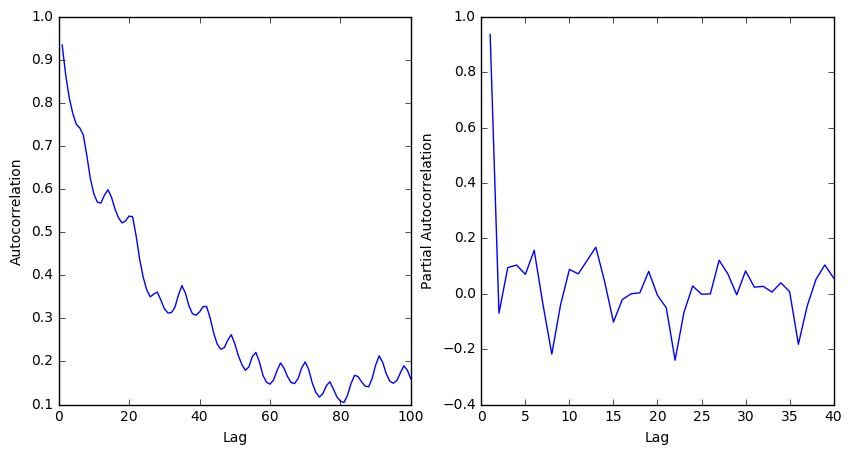

In [250]:
#the Acf is limited to 100 lags only in this case
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.plot(range(len(autocorrelation))[1:], autocorrelation[1:])
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax2.plot(range(len(partial_autocorr))[1:], partial_autocorr[1:])
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')

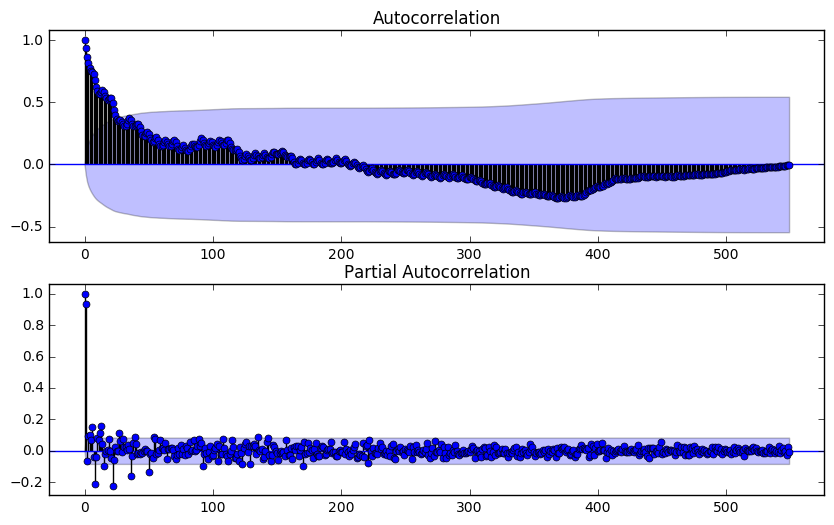

In [251]:
#the Acf is not limited to 100 lags in this case hence the different plot
from statsmodels.graphics import tsaplots
fig, axes = plt.subplots( 2, figsize=(10,6))
_ = tsaplots.plot_acf(avg['en'], axes[0])
_ = tsaplots.plot_pacf(avg['en'], axes[1])


As the ACF plot tails of and the PACF plot cuts off we will use the AR(p) model

reference from https://datascience.ibm.com/exchange/public/entry/view/815137c868b916821dec777bdc23013c    
In this plot, the 'p' and 'q' values can be determined as follows:   
p: The lag value where the PACF cuts off (drops to 0) for the first time. If you look closely, p=2.
q: The lag value where the ACF chart crosses the upper confidence interval for the first time. If you look closely, q=1.
This means that the optimal values for the ARIMA(p,d,q) model are (2,1,1).
If your assessment of the ACF and PACF plots differs from the values suggested by the arma_order_select_ic function, you should plug in different values for the p and q terms and use the model fit results to study the AIC values and proceed with the model with a lower AIC value

In [252]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels
model = ARIMA(avg['en'], order=(1,2,0))
model_fit = model.fit()

In [253]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  548
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -4110.540
Method:                       css-mle   S.D. of innovations            437.850
Date:                Thu, 28 Sep 2017   AIC                           8227.080
Time:                        18:44:01   BIC                           8239.999
Sample:                    07-03-2015   HQIC                          8232.129
                         - 12-31-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.5489     13.235     -0.041      0.967       -26.489    25.391
ar.L1.D2.y    -0.4140      0.039    -10.615      0.000        -0.490    -0.338
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.4155           +0.0000j            2.4155            0.5000
-----------------------------------------------------------------------------
"""

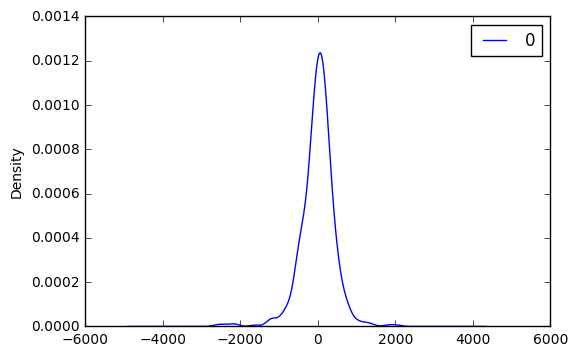

In [254]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')

In [255]:
avg['en'].shift().head(10)

2015-07-01            NaN
2015-07-02    3513.862203
2015-07-03    3502.511407
2015-07-04    3325.357889
2015-07-05    3462.054256
2015-07-06    3575.520035
2015-07-07    3849.736021
2015-07-08    3643.523063
2015-07-09    3437.871080
2015-07-10    3517.459391
dtype: float64

In [256]:
avg['en'].head(10)

2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
2015-07-06    3849.736021
2015-07-07    3643.523063
2015-07-08    3437.871080
2015-07-09    3517.459391
2015-07-10    3497.571594
dtype: float64

In [257]:
differencedEn= avg['en'] - avg['en'].shift()
differencedEn.head(10)

2015-07-01           NaN
2015-07-02    -11.350796
2015-07-03   -177.153518
2015-07-04    136.696366
2015-07-05    113.465779
2015-07-06    274.215986
2015-07-07   -206.212958
2015-07-08   -205.651983
2015-07-09     79.588311
2015-07-10    -19.887797
dtype: float64

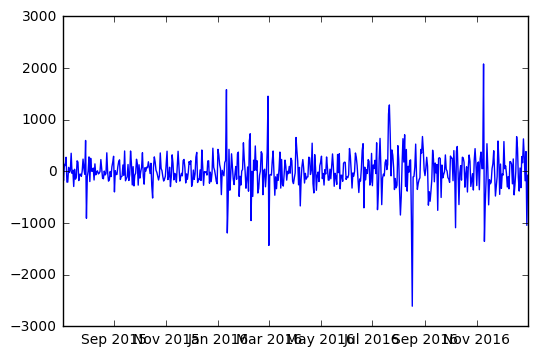

In [258]:
#use differencing to make ts stationary
differencedEn= avg['en'] - avg['en'].shift()
plt.plot(differencedEn)
# the time series looks pretty much stationary

In [259]:
differencedEn = differencedEn[1:] #removing first term as it is NaN

In [260]:
dftest = adfuller(differencedEn, autolag='AIC')
print "Results of Augmented Dickey Fuller Test for en"
dfoutput = pd.Series(dftest[0:4], 
                     index=['Test Statistic',
                            'p-value',
                            '#Lags Used',
                            'Number of Observations Used'])

for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                -8.254153e+00
p-value                        5.292475e-13
#Lags Used                     1.300000e+01
Number of Observations Used    5.350000e+02
Critical Value (5%)           -2.866957e+00
Critical Value (1%)           -3.442632e+00
Critical Value (10%)          -2.569655e+00
dtype: float64

as P value is far less than the significance level of 0.05 and test statistic is less than 1% critical value we can say that the the series is now stationary

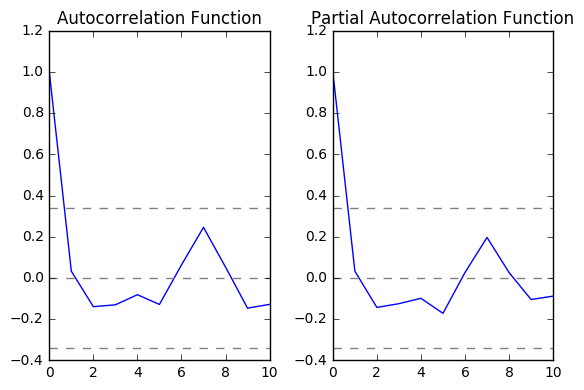

In [261]:
#ACF and PACF plots

lag_acf = acf(differencedEn, nlags=10)
lag_pacf = pacf(differencedEn, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(differencedEn)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(differencedEn)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(differencedEn)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(differencedEn)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

reference from https://datascience.ibm.com/exchange/public/entry/view/815137c868b916821dec777bdc23013c    
In this plot, the 'p' and 'q' values can be determined as follows:   
p: The lag value where the PACF cuts off (drops to 0) for the first time. If you look closely, p=1.
q: The lag value where the ACF chart crosses the upper confidence interval for the first time. If you look closely, q=1.
This means that the optimal values for the ARIMA(p,d,q) model are (1,1,1).
If your assessment of the ACF and PACF plots differs from the values suggested by the arma_order_select_ic function, you should plug in different values for the p and q terms and use the model fit results to study the AIC values and proceed with the model with a lower AIC value

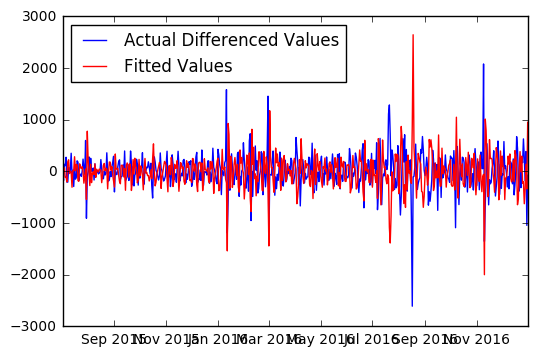

In [279]:
# AR(1 1 1) gives error
model = ARIMA(differencedEn, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(differencedEn, label='Actual Differenced Values')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values')
plt.legend(loc='best')


In [280]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  548
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3978.460
Method:                       css-mle   S.D. of innovations            342.092
Date:                Thu, 28 Sep 2017   AIC                           7966.919
Time:                        18:45:19   BIC                           7988.451
Sample:                    07-03-2015   HQIC                          7975.335
                         - 12-31-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0021      0.084     -0.025      0.980        -0.166     0.162
ar.L1.D.y      0.0391      0.042      0.924      0.356        -0.044     0.122
ar.L2.D.y     -0.1406      0.043     -3.301      0.001        -0.224    -0.057
ma.L1.D.y     -0.9999      0.005   -216.659      0.000        -1.009    -0.991
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1390           -2.6628j            2.6664           -0.2417
AR.2            0.1390           +2.6628j            2.6664            0.2417
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

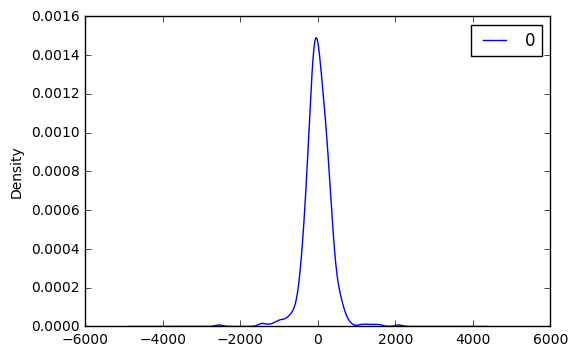

In [281]:
# plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')


In [266]:
residuals.describe()

,0
count,548.000000
mean,0.427783
std,343.402349
min,-2548.768453
25%,-161.148721
50%,-6.889536
75%,185.726567
max,2081.930749


In [267]:
pAR = []
diff = []
qMA = []
aic = []

for p in range(4):
    for d in range(2):
        for q in range(3):
            try:
                arima_mod=sm.tsa.ARIMA(differencedEn,(p,d,q)).fit(transparams=True)
                x =arima_mod.aic
            except:
                x = -1
            pAR.append(p)
            diff.append(d)
            qMA.append(q)
            aic.append(x)

In [268]:
# keys = pdq
# values = aic
# d = dict(zip(keys, values))
# print (d)

# minaic=min(d, key=d.get)

# for i in range(3):
#  p=minaic[0]
#     d=minaic[1]
#     q=minaic[2]
# print (p,d,q)
dataDict = {'p': pAR, 'd': diff, 'q':qMA, 'AIC':aic}
results = pd.DataFrame(dataDict)
results = results[['p', 'd', 'q', 'AIC']].sort('AIC')
results

,p,d,q,AIC
11,1,1,2,-1.000000
10,1,1,1,-1.000000
20,3,0,2,7892.772128
14,2,0,2,7895.146268
17,2,1,2,7952.466146
19,3,0,1,7953.552679
23,3,1,2,7954.435251
8,1,0,2,7956.299800
13,2,0,1,7956.349643
7,1,0,1,7958.254176


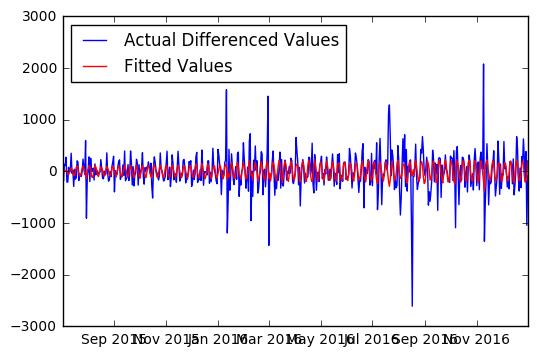

In [274]:
# Plotting  ARIMA(3 0 2) gives error
model = ARIMA(differencedEn, order=(3, 0, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(differencedEn, label='Actual Differenced Values')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values')
plt.legend(loc='best')

In [275]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:                     ARMA(3, 2)   Log Likelihood               -3939.386
Method:                       css-mle   S.D. of innovations            314.479
Date:                Thu, 28 Sep 2017   AIC                           7892.772
Time:                        18:44:57   BIC                           7922.929
Sample:                    07-02-2015   HQIC                          7904.558
                         - 12-31-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.3328     12.322      0.108      0.914       -22.818    25.484
ar.L1.y        1.1559      0.002    598.649      0.000         1.152     1.160
ar.L2.y       -0.8864      0.001   -835.590      0.000        -0.888    -0.884
ar.L3.y       -0.0910      0.001   -110.104      0.000        -0.093    -0.089
ma.L1.y       -1.2411      0.013    -92.604      0.000        -1.267    -1.215
ma.L2.y        0.9952      0.029     34.524      0.000         0.939     1.052
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6235           -0.7818j            1.0000           -0.1429
AR.2            0.6235           +0.7818j            1.0000            0.1429
AR.3          -10.9826           -0.0000j           10.9826           -0.5000
MA.1            0.6236           -0.7849j            1.0024           -0.1431
MA.2            0.6236           +0.7849j            1.0024            0.1431
-----------------------------------------------------------------------------
"""

In [291]:
predictionsARIMADiff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictionsARIMADiff = predictionsARIMADiff*-1

In [292]:
predictions_ARIMA_diff_cumsum = predictionsARIMADiff.cumsum()
predictions = pd.Series(avg['en'][0], index=avg['en'].index)
predictions = predictions.add(predictions_ARIMA_diff_cumsum,fill_value=0)
# predictions = predictions_ARIMA_diff_cumsum + avg['en'][0]


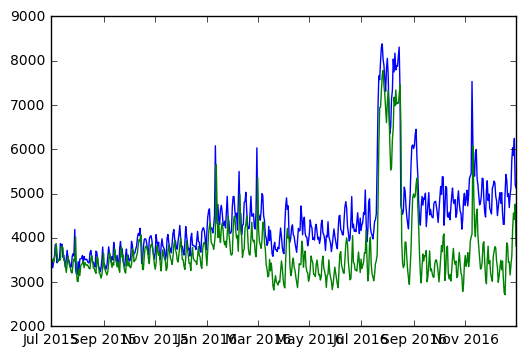

In [293]:
plt.plot(avg['en'])
plt.plot(predictions)